# 2 출생아 수 및 합계출산율
---
- 합계 출산율이란?
한 여자가 가임기간(15~49세)에 낳을 것으로 기대되는 평균 출생아 수

## 데이터 가져오기
---

In [1]:
import pandas as pd

df = pd.read_excel("stat_142801.xls", skiprows=2, nrows=2, index_col=0)
df

,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


- index_col의 값이 없기 떄문에 정수값을 넣어줘도 된다.  0번쨰 위치 column 설정
- nrows : 년도는 column 헤더 역할이기 떄문에 년도를 제외한 2개의 row만 가져온다. 

In [2]:
df.index

Index(['출생아 수', '합계 출산율'], dtype='object')

In [3]:
df.index.values

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

- df['출생아 수'] 에러가 발생
- \xa0 : 유니코드의 종류로써 띄어쓰기를 의미

### index 값 변경
---

In [4]:
df.rename(index={"출생아\xa0수" : "출생아 수", "합계\xa0출산율" : "합계 출산율"}, inplace=True)
df

,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [5]:
df.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [6]:
df.loc["출생아 수"]

2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

In [7]:
df.iloc[0]

2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

## column 과 row 데이터 변경
---

In [8]:
df = df.T
df

,출생아 수,합계 출산율
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.840


## 그래프 생성
---

In [9]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = "Malgun Gothic" # windows
matplotlib.rcParams["font.size"] = 15
matplotlib.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상 해결

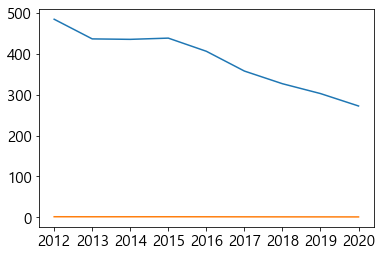

In [10]:
plt.plot(df.index, df["출생아 수"])
plt.plot(df.index, df["합계 출산율"])

- 출생아 수와 합계 출산율 차이가 너무 커서 보는데 문제가 생겼다.
- x 축을 공유하고 새로운 y 축을 만든다.

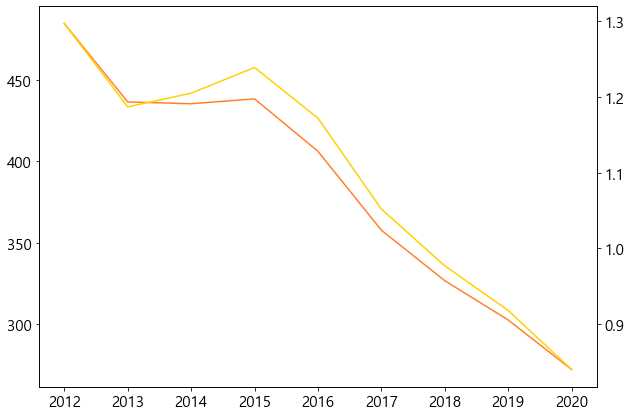

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(df.index, df["출생아 수"], c="#ff812d")

ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.plot(df.index, df["합계 출산율"], c="#ffd100")

### 그래프 변경
---
- 출생아 수 막대 그래프로 변경

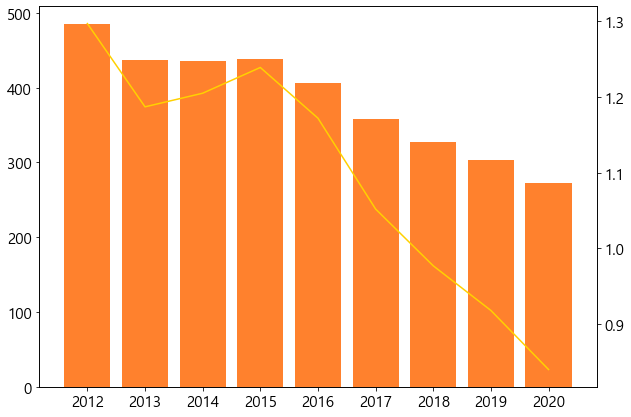

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.bar(df.index, df["출생아 수"], color="#ff812d")

ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.plot(df.index, df["합계 출산율"], color="#ffd100")

### 레이블 추가
---

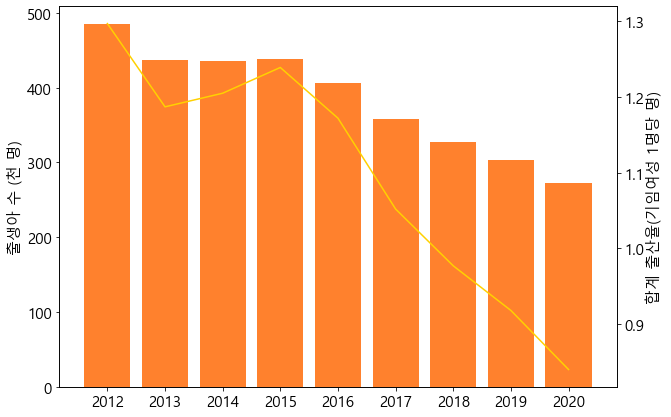

In [13]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_ylabel("출생아 수 (천 명)")
ax1.bar(df.index, df["출생아 수"], color="#ff812d")

ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.set_ylabel("합계 출산율(기임여성 1명당 명)")
ax2.plot(df.index, df["합계 출산율"], color="#ffd100")

### 출생아 수 y 축 ticks 수정
---

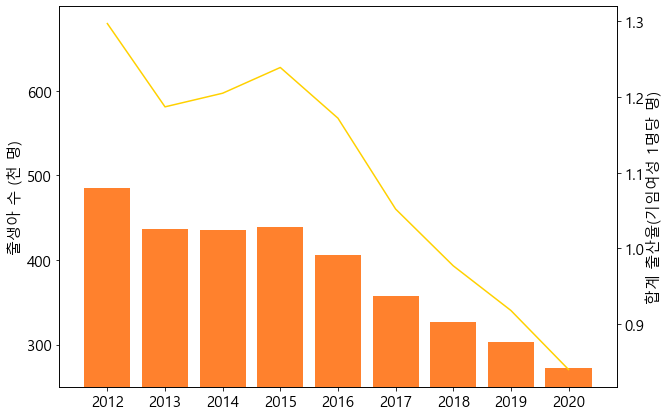

In [14]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_ylabel("출생아 수 (천 명)")
ax1.set_ylim(250, 700)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df["출생아 수"], color="#ff812d")

ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.set_ylabel("합계 출산율(기임여성 1명당 명)")
ax2.plot(df.index, df["합계 출산율"], color="#ffd100")

### 합계 출산율 y 축 ticks 수정
---

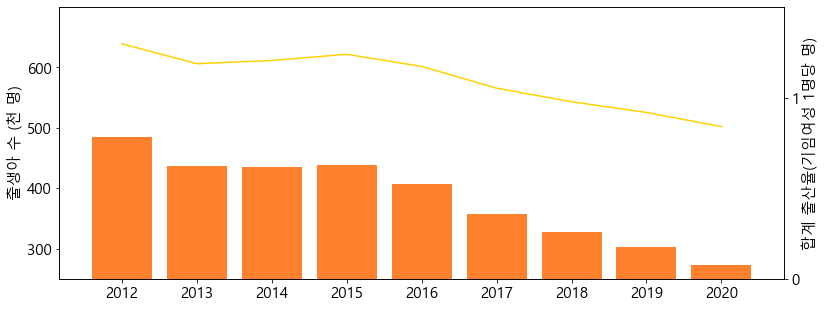

In [15]:
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.set_ylabel("출생아 수 (천 명)")
ax1.set_ylim(250, 700) # 최소/최대 값
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df["출생아 수"], color="#ff812d")

ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.set_ylabel("합계 출산율(기임여성 1명당 명)")
ax2.set_ylim(0, 1.5) # 최소/최대 값
ax2.set_yticks([0, 1])
ax2.plot(df.index, df["합계 출산율"], color="#ffd100")

### 각 데이터 값 입력
---

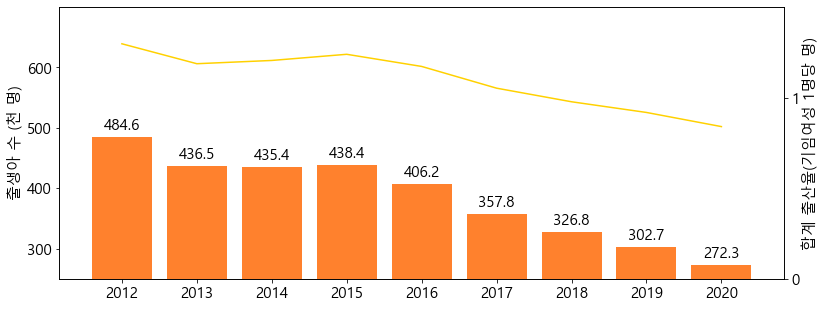

In [16]:
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.set_ylabel("출생아 수 (천 명)")
ax1.set_ylim(250, 700) # 최소/최대 값
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df["출생아 수"], color="#ff812d")

# 출생아 수 값 입력
for idx, val in enumerate(df["출생아 수"]):
    # 중앙 정렬
    ax1.text(idx, val + 12, val, ha="center")


ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.set_ylabel("합계 출산율(기임여성 1명당 명)")
ax2.set_ylim(0, 1.5) # 최소/최대 값
ax2.set_yticks([0, 1])
ax2.plot(df.index, df["합계 출산율"], color="#ffd100")

### ax2 스타일
---

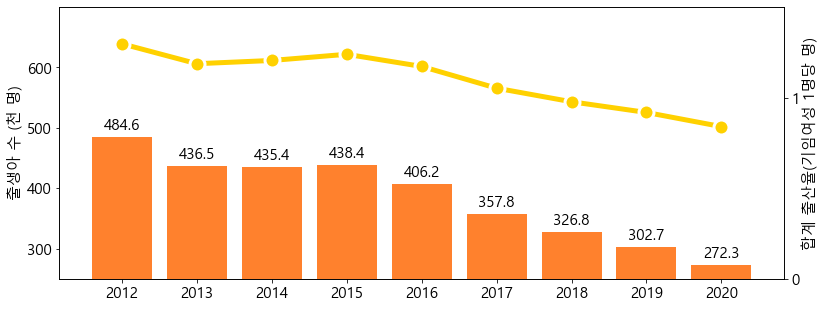

In [17]:
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.set_ylabel("출생아 수 (천 명)")
ax1.set_ylim(250, 700) # 최소/최대 값
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df["출생아 수"], color="#ff812d")

# 출생아 수 값 입력
for idx, val in enumerate(df["출생아 수"]):
    # 중앙 정렬
    ax1.text(idx, val + 12, val, ha="center")


ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.set_ylabel("합계 출산율(기임여성 1명당 명)")
ax2.set_ylim(0, 1.5) # 최소/최대 값
ax2.set_yticks([0, 1])
# marker, ms(markerstyle) , lw(linewidth), mec(markeredgecolor), mew(markeredgewidth) 입력
ax2.plot(df.index, df["합계 출산율"], color="#ffd100", marker='o', ms=15, lw=5, mec="w", mew=3)

### 합계 출산율 각 데이터 입력
---

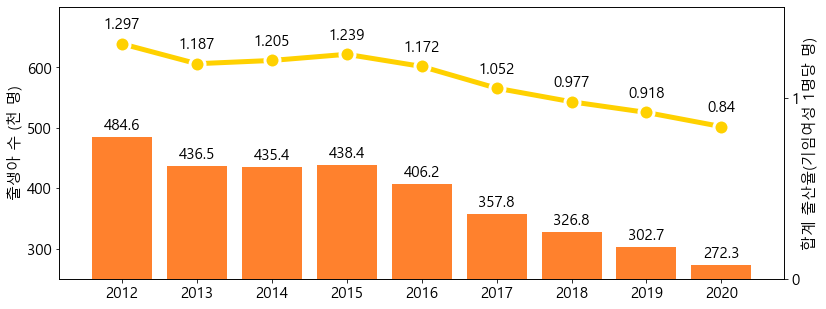

In [18]:
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.set_ylabel("출생아 수 (천 명)")
ax1.set_ylim(250, 700) # 최소/최대 값
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df["출생아 수"], color="#ff812d")

# 출생아 수 값 입력
for idx, val in enumerate(df["출생아 수"]):
    # 중앙 정렬
    ax1.text(idx, val + 12, val, ha="center")


ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.set_ylabel("합계 출산율(기임여성 1명당 명)")
ax2.set_ylim(0, 1.5) # 최소/최대 값
ax2.set_yticks([0, 1])
# marker, ms(markerstyle) , lw(linewidth), mec(markeredgecolor), mew(markeredgewidth) 입력
ax2.plot(df.index, df["합계 출산율"], color="#ffd100", marker='o', ms=15, lw=5, mec="w", mew=3)

# 합계 출산율 값 입력
for idx, val in enumerate(df["합계 출산율"]):
    # 중앙 정렬
    ax2.text(idx, val + 0.08, val, ha="center")

### 제목 입력
---

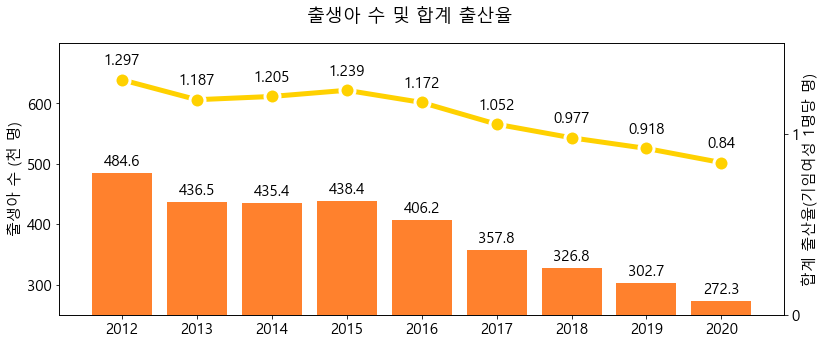

In [19]:
fig, ax1 = plt.subplots(figsize=(13, 5))
fig.suptitle("출생아 수 및 합계 출산율") # 제목
ax1.set_ylabel("출생아 수 (천 명)")
ax1.set_ylim(250, 700) # 최소/최대 값
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df["출생아 수"], color="#ff812d")

# 출생아 수 값 입력
for idx, val in enumerate(df["출생아 수"]):
    # 중앙 정렬
    ax1.text(idx, val + 12, val, ha="center")


ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.set_ylabel("합계 출산율(기임여성 1명당 명)")
ax2.set_ylim(0, 1.5) # 최소/최대 값
ax2.set_yticks([0, 1])
# marker, ms(markerstyle) , lw(linewidth), mec(markeredgecolor), mew(markeredgewidth) 입력
ax2.plot(df.index, df["합계 출산율"], color="#ffd100", marker='o', ms=15, lw=5, mec="w", mew=3)

# 합계 출산율 값 입력
for idx, val in enumerate(df["합계 출산율"]):
    # 중앙 정렬
    ax2.text(idx, val + 0.08, val, ha="center")

## 참고
---
[e-나라지표](https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1428)  
[나도 코딩 유튜브](https://www.youtube.com/watch?v=PjhlUzp_cU0&t=16118s)